In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### Dataset: salary_Data.csv, Social_Network_Ads.csv, Mall_Customers.csv
##### Location: https://mitu.co.in/dataset

### Linear Regression

In [29]:
df = pd.read_csv('Salary_Data.csv')

In [5]:
import os
os.getcwd()

'C:\\Users\\HP'

In [6]:
df.shape

(30, 2)

In [7]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


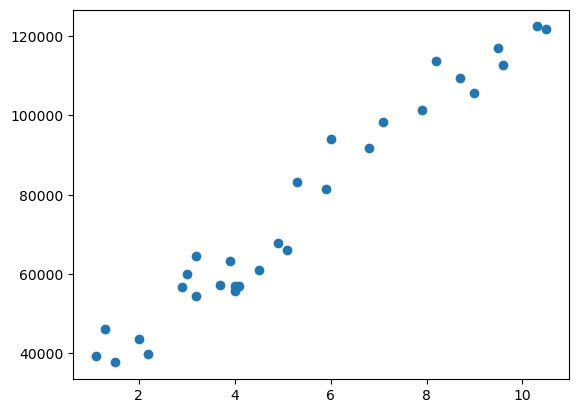

In [8]:
plt.scatter(df['YearsExperience'], df['Salary'])

#### separate input and output data

In [9]:
x = df['YearsExperience'].values
y = df['Salary']

In [10]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [11]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

#### in array form instead of series because i/p data should be in 2d

In [30]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
x = x.reshape(30,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

#### import linear regression class

In [13]:
from sklearn.linear_model import LinearRegression

#### create the object of linear regression

In [14]:
regressor = LinearRegression()

#### train the algorithm

In [15]:
regressor.fit(x,y)

LinearRegression()

####  predict on unseen data

In [16]:
regressor.predict([[15]])

array([167541.63502049])

In [17]:
regressor.predict([[20]])

array([214791.44662777])

In [18]:
regressor.predict([[0]])

array([25792.20019867])

In [19]:
regressor.predict([[1]])

array([35242.16252012])

In [20]:
regressor.score(x,y)

0.9569566641435086

## Day4

### Multiple Regression

In [31]:
df = pd.read_csv('mtcars.csv')

In [23]:
df.shape

(32, 11)

In [24]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Karl Pearson's correlation coefficient r

In [26]:
df.corrwith(df['mpg'])

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

### separate the i/p and o/p variables

In [34]:
x = df[['disp','hp','wt']]
y = df['mpg']

In [35]:
x

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440
5,225.0,105,3.460
6,360.0,245,3.570
7,146.7,62,3.190
8,140.8,95,3.150
9,167.6,123,3.440


### import class

In [36]:
from sklearn.linear_model import LinearRegression

### create object

In [39]:
reg = LinearRegression()

### Train the model

In [41]:
reg.fit(x,y)

LinearRegression()

### predict on unseen data

In [43]:
disp = 221
hp = 102
wt = 2.91
reg.predict([[disp,hp,wt]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.65986648])

In [45]:
disp = 221
hp = 102
wt = 2.51
reg.predict([[disp,hp,wt]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.18022271])

In [46]:
disp = 221
hp = 102
wt = 3.51
reg.predict([[disp,hp,wt]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.37933213])

### visualize

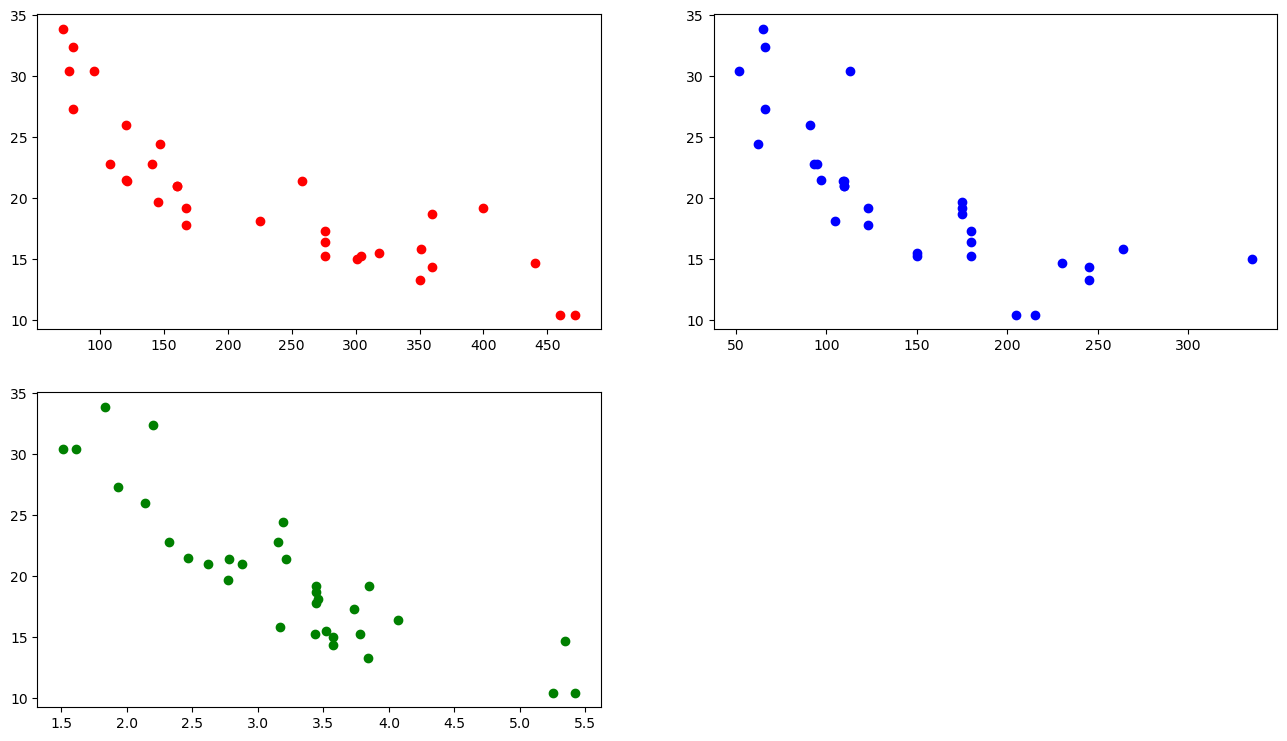

In [48]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
plt.scatter(df['disp'], y , color = 'r')
plt.subplot(2,2,2)
plt.scatter(df['hp'], y , color = 'b')
plt.subplot(2,2,3)
plt.scatter(df['wt'], y , color = 'g')

In [49]:
reg.score(x,y)

0.8268361424946447